# Import


In [42]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


# LOAD DATA 

## Labélisation des données

In [46]:
df = pd.read_csv('datasetiot.csv')
# keep 100 000 first rows
df = df.iloc[:100000]
# add columns empty columns to the dataframe this will be used to store the labels
df['label'] = np.nan
df['label'] = df['label'].astype('category')
#set category types
df['label'].cat.set_categories(['Normal', 'Keylogger', 'Reverse Shell', 'SYN Flood'], inplace=True)

# line 0 to 5150 is FTP traffic
df.loc[0:5150, 'label'] = 'Normal'
# line 5151 to 18600 is SSH traffic
df.loc[5151:18600, 'label'] = 'Normal'
# line 18601 to 28000 is FTP + SSH traffic
df.loc[18601:28000, 'label'] = 'Normal'
# line 28000 to 40100 is Keylogger traffic
df.loc[28000:40100, 'label'] = 'Keylogger'
# line 40101 to 46500 is FTP + SSH 
df.loc[40101:46500, 'label'] = 'Normal'
# line 46501 to 54100 is Reverse Shell
df.loc[46501:54100, 'label'] = 'Reverse Shell'
# line 54101 to 57150 is FTP + SSH
df.loc[54101:57150, 'label'] = 'Normal'
# the rest is syn flood
df.loc[57151:, 'label'] = 'SYN Flood'
# merge label SSH and FTP + SSH and FTP as "Normal"



C:\Users\enzoh\AppData\Local\Temp\ipykernel_21588\1072877512.py:8: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  df['label'].cat.set_categories(['Normal', 'Keylogger', 'Reverse Shell', 'SYN Flood'], inplace=True)


In [47]:
# show labels for protocol DNS
df.loc[df['Protocol'] == 'DNS', 'label'].value_counts()

Normal           270
Keylogger         44
Reverse Shell     34
SYN Flood          4
Name: label, dtype: int64

In [49]:
# show labels for protocol  FTP, and TLSv1 and TLSv1.2 and SSDP AND FTP-DATA
df.loc[df['Protocol'].isin(['FTP', 'TLSv1', 'TLSv1.2', 'SSDP', 'FTP-DATA']), 'label'].value_counts()
# class these protocols as normal
df.loc[df['Protocol'].isin(['FTP', 'TLSv1', 'TLSv1.2', 'SSDP', 'FTP-DATA']), 'label'] = 'Normal'

## Quelques visualisations

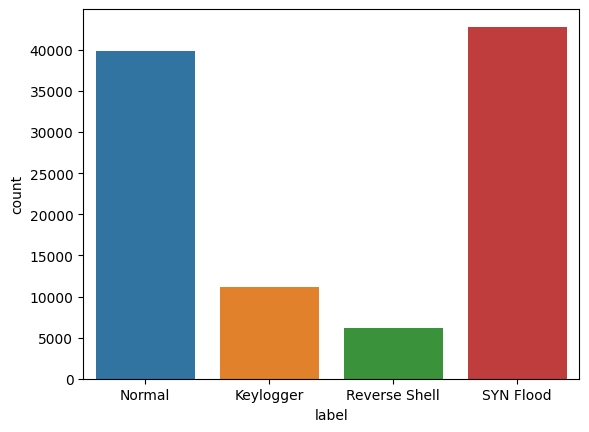

In [50]:
# plot diffrent features
# plot the distribution of the label
sns.countplot(x='label', data=df)
plt.show()
    

In [51]:
# print all features
print(df.columns)

Index(['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info',
       'label'],
      dtype='object')


## Preprocessing


In [28]:
# preprocess the data
# drop the columns that are not needed "No" , "Time"
#df = df.drop(['No.', 'Time'], axis=1)


In [29]:
df.head()

,No.,Time,Source,Destination,Protocol,Length,Info,label
0,1,0.000000,192.168.174.1,239.255.255.250,SSDP,166,M-SEARCH * HTTP/1.1,Normal
1,2,0.060725,192.168.174.1,239.255.255.250,SSDP,171,M-SEARCH * HTTP/1.1,Normal
2,3,-0.001392,172.16.0.1,239.255.255.250,SSDP,166,M-SEARCH * HTTP/1.1,Normal
3,4,0.060623,172.16.0.1,239.255.255.250,SSDP,171,M-SEARCH * HTTP/1.1,Normal
4,5,10.001488,192.168.174.1,239.255.255.250,SSDP,166,M-SEARCH * HTTP/1.1,Normal


In [52]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df.head()

# convert categorical data to numerical data
df['Protocol'] = df['Protocol'].astype('category')
df['Protocol'] = df['Protocol'].cat.codes
df['Source'] = df['Source'].astype('category')
df['Source'] = df['Source'].cat.codes
df['Destination'] = df['Destination'].astype('category')
df['Destination'] = df['Destination'].cat.codes
df['Info'] = df['Info'].astype('category')
df['Info'] = df['Info'].cat.codes
df.head()


# label_encoders = {}
# for column in df.columns:
#     if df[column].dtype == type(object):
#         label_encoders[column] = LabelEncoder()
#         df[column] = label_encoders[column].fit_transform(df[column])

# df.head()


,No.,Time,Source,Destination,Protocol,Length,Info,label
0,1,0.000000,10155,11194,13,166,76629,Normal
1,2,0.060725,10155,11194,13,171,76629,Normal
2,3,-0.001392,8070,11194,13,166,76629,Normal
3,4,0.060623,8070,11194,13,171,76629,Normal
4,5,10.001488,10155,11194,13,166,76629,Normal


In [45]:
df.dtypes

No.               int64
Time            float64
Source           object
Destination      object
Protocol         object
Length            int64
Info             object
label          category
dtype: object

In [37]:
# vlaue count of label
df['label'].value_counts()

3    42849
1    37450
0    12101
2     7600
Name: label, dtype: int64

In [41]:
from sklearn.cluster import KMeans

df_normal = df[df['label'] == 1]
# drop first and second columns
df_normal = df_normal.drop(df_normal.columns[[0, 1]], axis=1)
# find line that are similar to each other and show how many similar lines there are
# create a copy of the dataframe
df_clustered = df_normal.copy()

# fit and predict K-means clustering on the encoded data
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df_clustered.select_dtypes(include=[np.number]))

# add the cluster labels to the copy of the original dataframe
df_clustered['cluster'] = clusters

#inverse label encore for all columns that were encoded
#inverse label encoding for all columns that were encoded
for column, encoder in label_encoders.items():
    if column in df_clustered.columns:
        df_clustered[column] = encoder.inverse_transform(df_clustered[column].astype(int))


df_clustered.head()


c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Source,Destination,Protocol,Length,Info,label,cluster
0,10155,11194,13,166,76629,1,1
1,10155,11194,13,171,76629,1,1
2,8070,11194,13,166,76629,1,1
3,8070,11194,13,171,76629,1,1
4,10155,11194,13,166,76629,1,1


,Source,Destination,Protocol,Length,Info,label,cluster
0,22,39,13,166,21791,1,1
1,22,39,13,171,21791,1,1
2,17,39,13,166,21791,1,1
3,17,39,13,171,21791,1,1
4,22,39,13,166,21791,1,1


In [8]:
# print all values of the label
print(df['label'].unique())
# print count of each label
print(df['label'].value_counts())

[1 0 2 3]
3    42849
1    37450
0    12101
2     7600
Name: label, dtype: int64


## Création des données d'entrainement et de test

In [53]:
import pandas as pd
import numpy as np

def format_data_time_step(data, time_step):
    """
    Format time-series data into a format suitable for training a recurrent neural network.

    Parameters
    ----------
    data : pd.DataFrame
        DataFrame containing the time-series data. The DataFrame should contain a 'label' column
        and one or more feature columns.

    time_step : int
        The number of time steps (i.e., rows) to include in each sample.

    Returns
    -------
    tuple
        A tuple containing the following six elements in the order given:

        train_data : numpy.ndarray
            An array of shape (n_samples_train, time_step, n_features) containing the training data.

        train_labels : numpy.ndarray
            An array of shape (n_samples_train,) containing the training labels.

        val_data : numpy.ndarray
            An array of shape (n_samples_val, time_step, n_features) containing the validation data.

        val_labels : numpy.ndarray
            An array of shape (n_samples_val,) containing the validation labels.

        test_data : numpy.ndarray
            An array of shape (n_samples_test, time_step, n_features) containing the test data.

        test_labels : numpy.ndarray
            An array of shape (n_samples_test,) containing the test labels.

    Notes
    -----
    This function splits the data into training, validation, and test sets and reshapes the data into
    samples of length `time_step`. The training set includes the first 70% of the data, the validation
    set includes the next 15%, and the test set includes the final 15%. But this is totally arbitrary so dont realy take in account
    """

    # Define the indices to use for creating the training, validation, and test datasets
    train_indices = [(0, 3500), (5150, 13000), (18600, 24500), (28000, 35000), (40100, 44000), (46500, 51500), (54101, int((len(data))*0.7))]
    val_indices = [(3501, 4300), (13001, 15500), (24501, 26500), (35001, 37500), (44000, 45250), (51501, 52750), (int((len(data))*0.7)+time_step-1, int((len(data))*0.85))]
    test_indices = [(4301, 5150), (15501, 18600), (26501, 28000), (37501, 40100), (45251, 46500), (52750, 54100), (int((len(data))*0.85)+time_step-1, len(data))]

    # Create the training, validation, and test dataframes by concatenating the parts specified in each tuple
    train_df = pd.concat([data.iloc[start:end] for start, end in train_indices])
    val_df = pd.concat([data.iloc[start:end] for start, end in val_indices])
    test_df = pd.concat([data.iloc[start:end] for start, end in test_indices])

    # Define a function to reshape the input data into the required format for LSTM models
    def reshape_data(data):
        data_list = []
        for i in range(len(data) - time_step + 1):
            data_list.append(data[i:i+time_step, :])
        return np.array(data_list)

    # Reshape the training data and extract the labels
    train_data = reshape_data(train_df.drop(['label'], axis=1).to_numpy())
    train_labels = train_df['label'].iloc[time_step-1:].to_numpy()

    # Reshape the validation data and extract the labels
    val_data = reshape_data(val_df.drop(['label'], axis=1).to_numpy())
    val_labels = val_df['label'].iloc[time_step-1:].to_numpy()

    # Reshape the test data and extract the labels
    test_data = reshape_data(test_df.drop(['label'], axis=1).to_numpy())
    test_labels = test_df['label'].iloc[time_step-1:].to_numpy()

    return train_data, train_labels, val_data, val_labels, test_data, test_labels



In [54]:
train_data, train_labels, val_data, val_labels, test_data, test_labels = format_data_time_step(df, 50)

# print the shape of every data with their name
print('train_data shape: ', train_data.shape)
print('train_labels shape: ', train_labels.shape)
print('val_data shape: ', val_data.shape)
print('val_labels shape: ', val_labels.shape)
print('test_data shape: ', test_data.shape)
print('test_labels shape: ', test_labels.shape)





train_data shape:  (49000, 50, 7)
train_labels shape:  (49000,)
val_data shape:  (25197, 50, 7)
val_labels shape:  (25197,)
test_data shape:  (25547, 50, 7)
test_labels shape:  (25547,)


# LES MODELS LALALALA 

In [56]:
num_labels = len(np.unique(train_labels))
print(num_labels)


4


In [55]:
input_shape = (train_data.shape[1], train_data.shape[2])

In [57]:
# create the model
simple_lstm_model = keras.Sequential([
    keras.layers.LSTM(128, input_shape=input_shape),
    keras.layers.Dense(num_labels, activation='softmax')
])

simple_lstm_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

simple_lstm_model.summary()

# model with 4 LSTM layers
model_stacked_lstm = keras.Sequential([
    keras.layers.LSTM(128, return_sequences=True, input_shape=input_shape),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(64),
    keras.layers.Dense(num_labels, activation='softmax')
])

model_stacked_lstm.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_stacked_lstm.summary()


# cnn model FOR NETWORK TRAFFIC
model_cnn = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(num_labels, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


# model CNN + LSTM
model_cnn_lstm = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.LSTM(64),
    keras.layers.Dense(num_labels, activation='softmax')
])

model_cnn_lstm.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_cnn_lstm.summary()

# model CNN + LSTM + LSTM
model_cnn_lstm_stacked = keras.Sequential([
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(64,return_sequences=True),
    keras.layers.LSTM(64),
    keras.layers.Dense(num_labels, activation='softmax')
])


model_cnn_lstm_stacked.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


model_bidirectional_LSTM = keras.Sequential()
model_bidirectional_LSTM.add(keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True), input_shape=input_shape))
model_bidirectional_LSTM.add(keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)))
model_bidirectional_LSTM.add(keras.layers.Bidirectional(keras.layers.LSTM(64)))
model_bidirectional_LSTM.add(keras.layers.Dense(32, activation='relu'))
model_bidirectional_LSTM.add(keras.layers.Dense(num_labels, activation='softmax'))
model_bidirectional_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_bidirectional_LSTM.summary()


model_rnn_lstm = keras.Sequential()
model_rnn_lstm.add(keras.layers.SimpleRNN(128, input_shape=input_shape, return_sequences=True))
model_rnn_lstm.add(keras.layers.SimpleRNN(128, return_sequences=True))
model_rnn_lstm.add(keras.layers.SimpleRNN(64, return_sequences=True))
model_rnn_lstm.add(keras.layers.LSTM(64))
model_rnn_lstm.add(keras.layers.Dense(32, activation='relu'))
model_rnn_lstm.add(keras.layers.Dense(num_labels, activation='softmax'))
model_rnn_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn_lstm.summary()





model_test = keras.Sequential()
# conv 2D layer 
model_test.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(train_data.shape[1], train_data.shape[2], 1)))
model_test.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model_test.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_test.add(keras.layers.Dropout(0.25))
# time distributed layer for output of conv2D
model_test.add(keras.layers.TimeDistributed(keras.layers.Flatten()))
# LSTM layer
model_test.add(keras.layers.LSTM(128, return_sequences=True))
model_test.add(keras.layers.LSTM(64))
model_test.add(keras.layers.Dense(32, activation='relu'))
model_test.add(keras.layers.Dense(num_labels, activation='softmax'))
model_test.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_test.summary()







Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               69632     
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
Total params: 70,148
Trainable params: 70,148
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50, 128)           69632     
                                                                 
 lstm_2 (LSTM)               (None, 50, 128)           131584    
                                                                 
 lstm_3 (LSTM)               (

In [58]:
# history_simple_lstm = simple_lstm_model.fit(train_data, train_labels, epochs=50,batch_size=128 ,validation_data=(val_data, val_labels))
# history_stacked_lstm = model_stacked_lstm.fit(train_data, train_labels, epochs=25,batch_size=128 ,validation_data=(val_data, val_labels))
# history_cnn = model_cnn.fit(train_data, train_labels, epochs=150,batch_size=128 ,validation_data=(val_data, val_labels))
# history_cnn_lstm = model_cnn_lstm.fit(train_data, train_labels, epochs=15,batch_size=128 ,validation_data=(val_data, val_labels))
# history_cnn_lstm_stacked = model_cnn_lstm_stacked.fit(train_data, train_labels, epochs=15,batch_size=128 ,validation_data=(val_data, val_labels))
# history_bidirectional_LSTM = model_bidirectional_LSTM.fit(train_data, train_labels, epochs=25,batch_size=128 ,validation_data=(val_data, val_labels))
# history_rnn_lstm = model_rnn_lstm.fit(train_data, train_labels, epochs=15,batch_size=128 ,validation_data=(val_data, val_labels))
history_model_test = model_test.fit(train_data, train_labels, epochs=100,batch_size=256 ,validation_data=(val_data, val_labels))



Epoch 1/100


UnimplementedError: Graph execution error:

Detected at node 'Cast_1' defined at (most recent call last):
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 1041, in launch_instance
      app.start()
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 724, in start
      self.io_loop.start()
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 512, in dispatch_queue
      await self.process_one()
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 501, in process_one
      await dispatch(*args)
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 408, in dispatch_shell
      await result
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 731, in execute_request
      reply_content = await reply_content
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 417, in do_execute
      res = shell.run_cell(
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\enzoh\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\enzoh\AppData\Local\Temp\ipykernel_21588\1988599080.py", line 8, in <module>
      history_model_test = model_test.fit(train_data, train_labels, epochs=100,batch_size=256 ,validation_data=(val_data, val_labels))
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 998, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1092, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\metrics\base_metric.py", line 143, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "c:\Users\enzoh\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\metrics\base_metric.py", line 685, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_1'
Cast string to float is not supported
	 [[{{node Cast_1}}]] [Op:__inference_train_function_14507]

In [65]:
# save model
model_test.save('CNN2D_LSTM.h5')

In [15]:
def plot_model_loss_accuracy(history,model_name):
  """ Plot the model loss and accuracy for training and validation data

  Args:
      history (keras.callbacks.History): History object returned by model.fit()
      model_name (str): Name of the model
  """
  plt.plot(history.history['accuracy'],label="Training Accuracy")
  plt.plot(history.history['val_accuracy'],label="Validation Accuracy")

  plt.plot(history.history['loss'],label="Training Loss")
  plt.plot(history.history['val_loss'],label="Validation Loss")
  # plot the max validation accuracy
  max_val_acc = max(history.history['val_accuracy'])
  max_val_acc_epoch = history.history['val_accuracy'].index(max_val_acc)
  plt.plot(max_val_acc_epoch, max_val_acc, marker='o', markersize=5, color="red")
  plt.annotate("Max Validation Accuracy: {:.2f}%".format(max_val_acc*100), (max_val_acc_epoch, max_val_acc), xytext=(max_val_acc_epoch, max_val_acc+0.05), arrowprops=dict(facecolor='black', shrink=0.05))
  plt.title('Training and Validation Accuracy/Loss for ' + model_name)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy/Loss')
  plt.legend()
  plt.show()

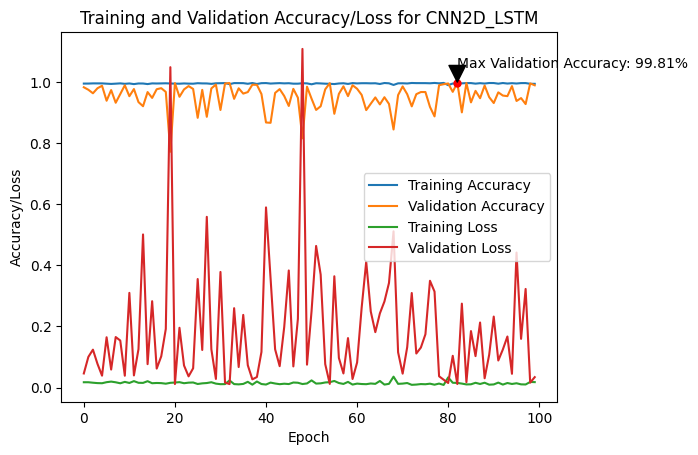

In [66]:
plot_model_loss_accuracy(history_model_test, "CNN2D_LSTM")

In [67]:
# evaluate the model on test data
score = model_test.evaluate(test_data, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 1.2603964805603027
Test accuracy: 0.7571926116943359


799/799 [==============================] - 3s 4ms/step


Text(0.5, 1.0, 'Confusion Matrix 2D CNN and LSTM')

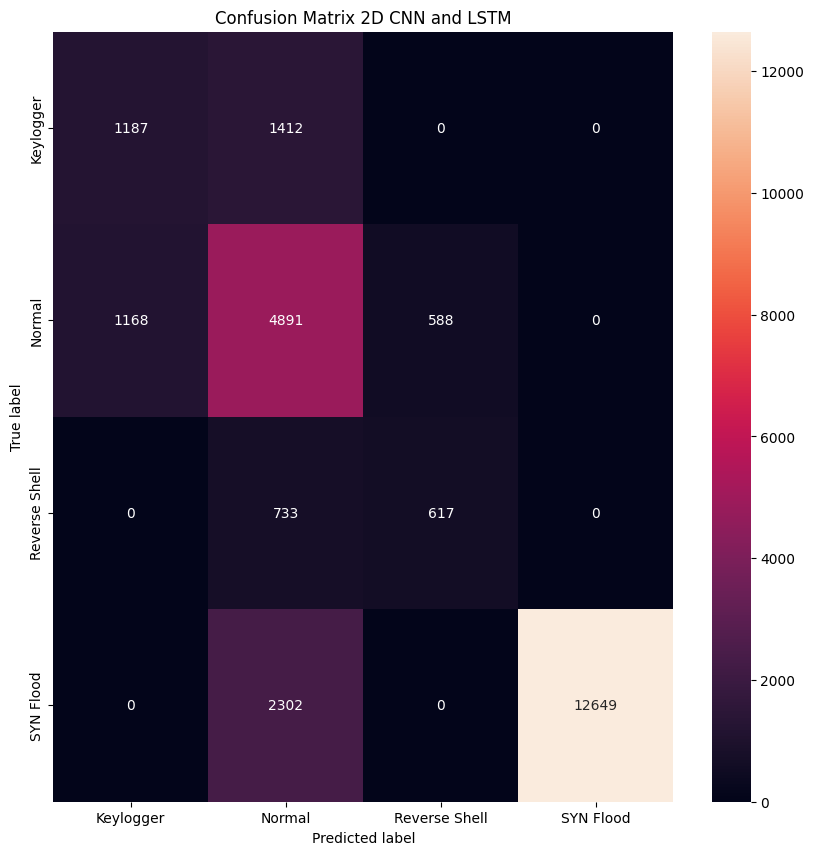

In [64]:
# confusion matrix on test data with original labels with label_encoder
import itertools
from sklearn.metrics import confusion_matrix


y_pred = model_test.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Create a DataFrame from the confusion matrix using the label names
cm_df = pd.DataFrame(cm, columns=label_encoder.classes_, index=label_encoder.classes_)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix 2D CNN and LSTM') 

